In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
random.seed(42)

In [172]:
df = pd.read_csv('DataFiles/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [173]:
df.shape

(294478, 5)

In [174]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [176]:
df.drop(df.query("group == 'treatment' and landing_page != 'new_page'").index, inplace = True)
df.drop(df.query("group != 'treatment' and landing_page == 'new_page'").index, inplace = True)
df2 = df

In [177]:
df2.shape

(290585, 5)

<a id='ab_test'></a>
### Part II - A/B Test

$$ p_{old} - p_{new} => 0$$

$$ p_{old} - p_{new} < 0 $$

In [178]:
# P_old under the null

p_old = df2.query("converted == 1").count()[4]/ df2["converted"].count()
p_old

C:\Users\DELL\AppData\Local\Temp\ipykernel_19316\199743315.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_old = df2.query("converted == 1").count()[4]/ df2["converted"].count()


0.11959667567149027

In [179]:
# P_new under the null

p_new = df2.query("converted == 1").count()[4]/ df2["converted"].count()
p_new

C:\Users\DELL\AppData\Local\Temp\ipykernel_19316\2125589424.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_new = df2.query("converted == 1").count()[4]/ df2["converted"].count()


0.11959667567149027

In [180]:
n_old = df2.query('group == "control"').count()[0]
n_old

C:\Users\DELL\AppData\Local\Temp\ipykernel_19316\853391046.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_old = df2.query('group == "control"').count()[0]


145274

In [181]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

C:\Users\DELL\AppData\Local\Temp\ipykernel_19316\2594878698.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_new = df2.query('group == "treatment"').count()[0]


145311

In [182]:
p_diff = p_new - p_old
p_diff

0.0

In [183]:
# Store 1, 0 in old_page_converted 

old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
old_page_converted

array([0, 1, 1, ..., 1, 1, 1])

In [184]:
# Store 1, 0 in new_page_converted

new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [185]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013736596084983344

In [186]:
p_diffs = []
size = df2.shape[0]
for i in range(100):
    sample = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
    old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())


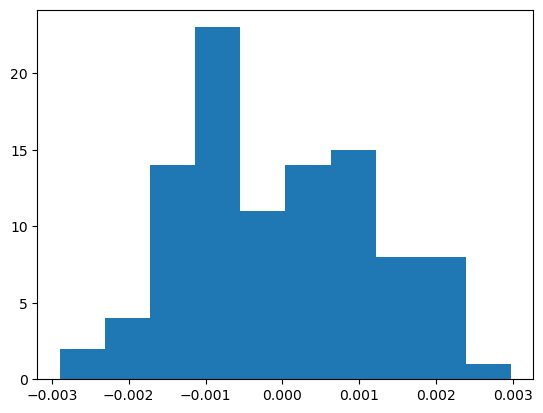

In [187]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);

In [188]:
import statsmodels.api as sm

convert_old = old_page_converted.mean()
convert_new = new_page_converted.mean()

n_old = n_old
n_new = n_new

In [189]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(-0.0012870174971202127, 0.5005134455534713)

In [190]:
from scipy.stats import norm

# Tell how significant the z-score is
norm.cdf(z_score)

0.49948655444652873

In [191]:
# Tell what the critical value at 95% confidence is

norm.ppf(1-(0.05/2))

1.959963984540054

- The z-score does not exceed the critical value which is around 1.96; therefore, **we fail to reject the null (H0).** 
- Also, the p-value is around 50% which is not significant.
- The results are all the same with the findings in parts j. and k. In other words, **there is no difference between the new and old pages and we keep the old version and do not change to the new version.**